In [25]:
from keras.models import load_model
import cv2
import numpy as np
from keras.preprocessing import image
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
%matplotlib inline

In [26]:
Classes = {'0': 0,
 '1': 1,
 '10': 2,
 '11': 3,
 '12': 4,
 '13': 5,
 '14': 6,
 '15': 7,
 '16': 8,
 '17': 9,
 '18': 10,
 '19': 11,
 '2': 12,
 '20': 13,
 '21': 14,
 '22': 15,
 '23': 16,
 '24': 17,
 '25': 18,
 '26': 19,
 '27': 20,
 '28': 21,
 '29': 22,
 '3': 23,
 '30': 24,
 '31': 25,
 '32': 26,
 '33': 27,
 '34': 28,
 '35': 29,
 '36': 30,
 '37': 31,
 '38': 32,
 '39': 33,
 '4': 34,
 '40': 35,
 '41': 36,
 '42': 37,
 '5': 38,
 '6': 39,
 '7': 40,
 '8': 41,
 '9': 42}

In [27]:
Sign_Names = {
    "1":"Speed limit (30km/h)",
"2":"Speed limit (50km/h)",
"13":"Yield/Wait",
"12":"Priority road",
"38":"Keep right",
"10":"No passing for vechiles over 3.5 metric tons",
"4":"Speed limit (70km/h)",
"5":"Speed limit (80km/h)",
"25":"Road work",
"9":"No passing",
"7":"Speed limit (100km/h)",
"3":"Speed limit (60km/h)",
"8":"Speed limit (120km/h)",
"11":"Right-of-way at the next intersection",
"18":"General caution",
"35":"Ahead only",
"17":"No entry",
"14":"Stop",
"31":"Wild animals crossing",
"33":"Turn right ahead",
"15":"No vechiles",
"26":"Traffic signals",
"28":"Children crossing",
"23":"Slippery road",
"16":"Vechiles over 3.5 metric tons prohibited",
"30":"Beware of ice/snow",
"34":"Turn left ahead",
"6":"End of speed limit (80km/h)",
"22":"Bumpy road",
"36":"Go straight or right",
"20":"Dangerous curve to the right",
"40":"Roundabout mandatory",
"21":"Double curve",
"24":"Road narrows on the right",
"29":"Bicycles crossing",
"39":"Keep left",
"27":"Pedestrians",
"32":"End of all speed and passing limits",
"41":"End of no passing",
"42":"End of no passing by vechiles over 3.5 metric tons",
"0":"Speed limit (20km/h)",
"19":"Dangerous curve to the left",
"37":"Go straight or left"
}

In [28]:
model_name = r'../Models/trafficSignalPredictor_20epochs_300Steps.h5'
model = load_model(model_name)

In [29]:
def predictTrafficSign(signBoard,model):
    '''
    height = signBoard.shape[0]
    width = signBoard.shape[1]
    FX = 50/width
    FY = 50/height
    print(FX,FY)
    signBoardScaled = cv2.resize(signBoard,None,fx=FX,fy=FY)
    print(signBoardScaled.shape)
    signBoardScaled = signBoardScaled.reshape(1,50,50,3)
    signBoardScaled = signBoardScaled/signBoardScaled.max()
    '''
    signBoardScaled = signBoard
    class_num = model.predict_classes(signBoardScaled)
    #print(signBoardScaled.shape)
    return class_num

In [30]:
img = '../../Test/01791.png'
img_data = image.load_img(img,target_size=(50,50))
img_data = image.img_to_array(img_data)
img_data = np.expand_dims(img_data,axis=0)
img_data = img_data/255
SignClass = predictTrafficSign(img_data,model)

Right-of-way at the next intersection


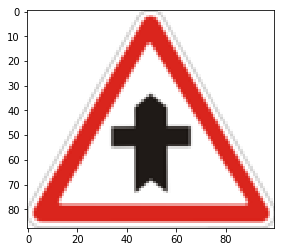

In [31]:
for key in Classes:
    if(Classes[key] == SignClass):
        FileName = '../../Meta/' + str(key) + '.png'
        #SignImage = cv2.imread(FileName)
        img = mpimg.imread(FileName)
        plt.imshow(img)
        print(Sign_Names[str(key)])